In [1]:
import sys
sys.setrecursionlimit(10000)
from time import time
import numpy as np
from Tree.tree_builder import tree_builder
from Tree.tree_values import TreeValues
from Tree.strategy_filling import strategy_filling
from Tree.tree_visualizer import tree_visualizer
from Tree.tree_cfr import TreeCFR
from helper_classes import TreeParams, Node
from Game.card_to_string_conversion import card_to_string
from Game.card_tools import card_tools
from Settings.constants import constants
from Settings.arguments import arguments
from Settings.game_settings import game_settings

In [2]:
PC = constants.players_count
CC = game_settings.card_count

# Tree Build

In [3]:
params = TreeParams()
params.limit_to_street = True
first_node = Node()
first_node.board = np.zeros([], dtype=int)
first_node.street = 1
first_node.current_player = constants.players.P1
first_node.bets = np.array([arguments.ante, arguments.ante], dtype=int)
params.root_node = first_node
params.limit_to_street = True

root = tree_builder.build_tree(params)
strategy_filling.fill_uniform(root)

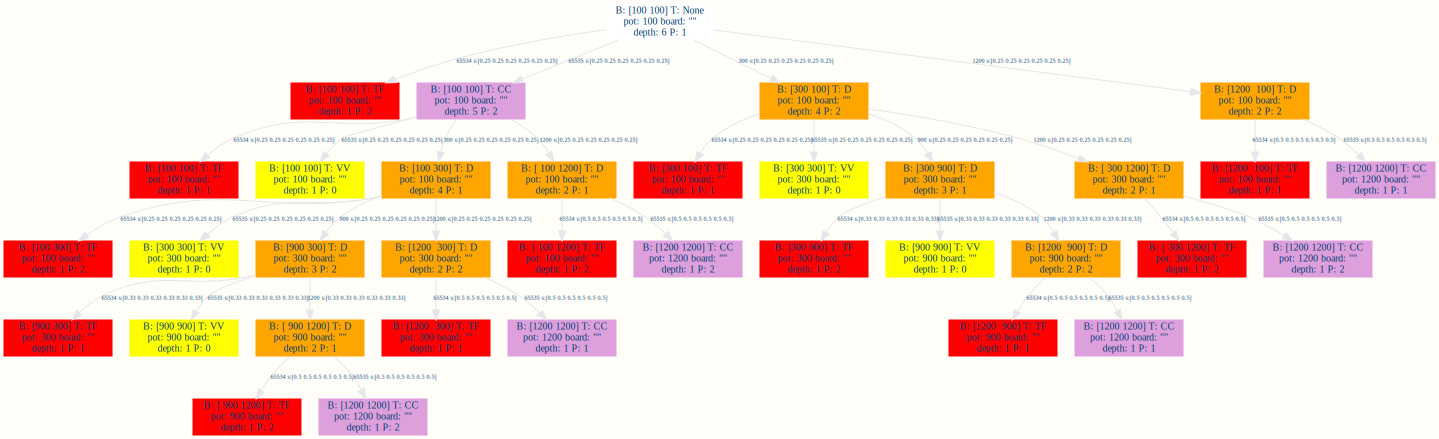

In [4]:
tree_visualizer.draw_tree(root, size='50,30')

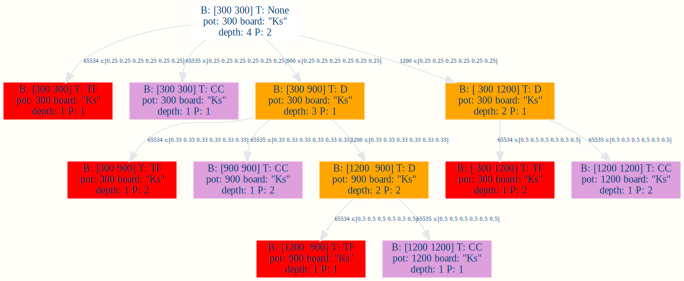

In [5]:
params = TreeParams()
params.root_node = Node()
params.root_node.board = card_to_string.string_to_board('Ks')
params.root_node.street = 2
params.root_node.current_player = constants.players.P2
params.root_node.bets = np.array([300, 300])
params.limit_to_street = False
root = tree_builder.build_tree(params)
tree_visualizer.draw_tree(root, size='20,10')

# Exploitability

In [6]:
params = TreeParams()

params.root_node = Node()
params.root_node.board = card_to_string.string_to_board('')
params.root_node.street = 1
params.root_node.current_player = constants.players.P1
params.root_node.bets = np.array([100, 100])

tree = tree_builder.build_tree(params)

tree_values = TreeValues()

starting_ranges = np.zeros([PC,CC], dtype=float)
starting_ranges[0] = card_tools.get_uniform_range(params.root_node.board)
starting_ranges[1] = card_tools.get_uniform_range(params.root_node.board)

tree_values.compute_values(tree, starting_ranges)

print('Exploitability: ' + str(tree.exploitability) + ' [chips]' )

Exploitability: 175.52084 [chips]


# CFR

In [8]:
params = TreeParams()

params.root_node = Node()
params.root_node.board = card_to_string.string_to_board('')
params.root_node.street = 1
params.root_node.current_player = constants.players.P1
params.root_node.bets = np.array([100, 100])

tree = tree_builder.build_tree(params)

starting_ranges = np.zeros([PC,CC], dtype=float)
starting_ranges[0] = card_tools.get_uniform_range(params.root_node.board)
starting_ranges[1] = card_tools.get_uniform_range(params.root_node.board)

t0 = time()
tree_cfr = TreeCFR()
tree_cfr.run_cfr(tree, starting_ranges)
print('Took time: {} for {} iters'.format(time()-t0, arguments.cfr_iters))

tree_values = TreeValues()
tree_values.compute_values(tree, starting_ranges)

print('Exploitability: ' + str(tree.exploitability) + ' [chips]' )

Took time: 28.371780395507812 for 1000 iters
Exploitability: 1.0608492 [chips]
